# 2 sample t-test with python3

Author: Yingding Wang

This example is based on the article of [Amulya Aankul](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f). This is very great introduction to the Student's T-tests.

This notebook extend the case for two sample distributions with **unequal sample sizes** and **unequal variance**. The might be the most case in examing the data in practice.

In [1]:
import numpy as np
from scipy import stats
np.random.seed(12)
## Define 2 random distributions
# Sample Size
N_a = 10
N_b = 20
# Gaussian distributed data with mean = 2 and variance = 1 (sigma ** 2)
a = np.random.randn(N_a) + 2
# Gaussian distributed data with mean = 0 and variance = 2.25 (sigma ** 2)
sigma = 1.5
b = sigma * np.random.randn(N_b)



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/yingding/VENV/udacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


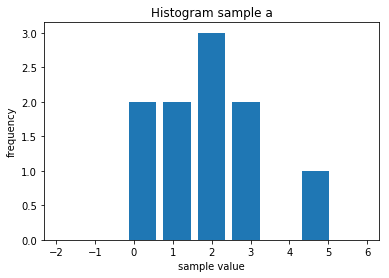

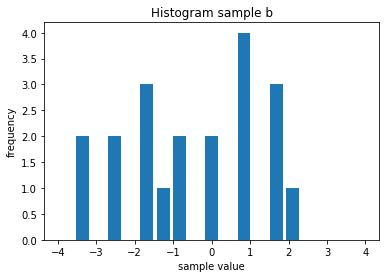

In [3]:
def hist_dist(values, hist_range, title):
    """
    Display histogram of ...
    """
    plt.title(title)
    # categorie per bin = 2
    num_bin = 1 # 2
    bins = np.linspace(*hist_range, num=len(values)/num_bin, endpoint=True)
    # bins = np.arange(*hist_range)
    # print(bins)
    # print(values)
    plt.hist(values, bins , rwidth=0.8, align='mid')
    plt.xlabel("sample value")
    plt.ylabel("frequency")
    plt.show()

hist_dist(a, (-2, 6), "Histogram sample a")
hist_dist(b, (-4, 4), "Histogram sample b")

# Calculate the Variance of the samples

In [4]:
#For unbiased max likelihood estimate we have to divide the var by N-1,
# and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

print("variance a: {}, variance b: {}".format(var_a, var_b))

variance a: 1.7166798381347061, variance b: 3.0567262572217047


## Calculate t-score
the number in sample a and sample b can by different

t-score can be calculated with

$t = \dfrac{M_a - M_b}{\sqrt{\dfrac{S_a^2}{N_a} + \dfrac{S_b^2}{N_b} }} $

where $M$ is mean, 

and $N$ is number of scores per sample

In [5]:
t = (a.mean() - b.mean())/np.sqrt(var_a/N_a + var_b/N_b)
t

4.29762495286625

## Determin degree of freedom df
In case the variance of $n_a$ and $n_b$ are the same:
$df = n_a + n_b - 2$

In case the variance are not the same ([Welch-Satterthwaite equation](https://en.wikipedia.org/wiki/Welch%27s_t-test)):
$df = \dfrac{\left(\dfrac{S_a^2}{N_a} + \dfrac{S_b^2}{N_b} \right)^2}{\dfrac{S_a^4}{N_a^2 * (N_a - 1)} + \dfrac{S_b^4}{N_b^2 * (N_b - 1)}}$

In [6]:
if var_a == var_b:
    df = N_a + N_b - 2
else:
    df = (var_a / N_a + var_b / N_b)**2 / \
    (var_a**2 / (N_a**2 * (N_a - 1)) + (var_b**2 / (N_b**2 * (N_b - 1)) ))
df

23.380667721408322

## P-value after comparison with the t

In [7]:
# we assume the sample distribution are t-distributed
p = 1 - stats.t.cdf(t, df=df)
p

0.00013003505340114518

## Multiply the p-value by 2 for a two tailed t-test
You can see that after comparing the t statistic with the critical t value (computed internally). we get a good p-value of 0.00026. Thus we reject the null hypothesis. It proves that the mean of the two distributions are different and statistically significant.

In [8]:
print("t = " + str(t))
print("p = {:7f}".format(2*p))

#Note that we multiply the p value by 2 because its a two tailed t-test

t = 4.29762495286625
p = 0.000260


## Cross Checking with the internal scipy function
**Note**: stats.ttest_ind() returns already the two tailed p-value

In [9]:
# in this example the variance of the two sample distribution are the same
# if it is not, set equal_val to False
t2, p2 = stats.ttest_ind(a,b, equal_var=False)

In [10]:
print("t = " + str(t2))
print("p = {:7f}".format(p2))

t = 4.29762495286625
p = 0.000260


## ttest_ind()

In [11]:
# use help to display the function docs
# help(stats.ttest_ind)

# Further thought

what might happy, if the sample size increases. Assume the size of samples are not $N_a=10$ or $N_b=20$ but 1000. What will change in the p-value.

**Answer** The histogram will look more like bell-shape. Since the sample a and sample b are drawn from the normal distribution with different means. Thus if would be more unlikely the mean of the two distributions are the same. It reflexs on the p-value. P-value will be very close to zero, which indicates the Null-Hypothesis (the mean of the two distribution are the same) can be very confidently rejected. 

Try to change the sample size $N_a$ or $N_b$ and see what happens :)